In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import json
import re

# Importing data

In [5]:
file_path = './data/dice_jobs_list.csv'

In [6]:
dice = pd.read_csv(file_path)

In [7]:
dice.head()

,salary,crawled_at,description,title,url,country,industry,job_type,longitude,currency,education_requirements,postal_code,location,raw_description,skills,latitude,_id,company,posted_at,source
0,Depends on Experience,"04/16/2021, 19:51:28","Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,28201,"Charlotte, NC","<div class=""highlight-black"" id=""jobdescSec"">\...",Azure AD,35.227085,6ea0725a-554f-5db9-8fa3-81b8eea3d9c6,"Nutech Systems, Inc.",2021-04-13T22:31:54Z,https://www.dice.com
1,Depends on Experience,"04/16/2021, 19:51:31",We are looking for a Ad Operations Associate f...,Ad Operations Associate,https://www.dice.com/jobs/detail/Ad-Operations...,NaN,IT Software,Contract W2,0.000000,USD,IT Diploma/Degree/Certification,NaN,NaN,"<div class=""highlight-black"" id=""jobdescSec"">\...","Account management, Advertising, Content marke...",0.000000,68afe519-ecca-5fe8-a553-2b4511d367e2,"Software Resources, Inc.",2021-04-12T16:31:29Z,https://www.dice.com
2,Depends on Experience,"04/16/2021, 19:51:34",Job Title: Ad Operations Onsite AnalystLocatio...,Ad Operations Analyst,https://www.dice.com/jobs/detail/Ad-Operations...,US,IT Software,"Contract W2, Contract Independent",-122.411090,USD,IT Diploma/Degree/Certification,94066,"San Bruno, CA","<div class=""highlight-black"" id=""jobdescSec"">\...","Campaign management, Media buying, Analytics, ...",37.630490,9221c243-e03a-5c7c-96f6-37d8edcd39a6,"Tranzeal, Inc.",2021-04-14T20:15:06Z,https://www.dice.com
3,Market,"04/16/2021, 19:51:37",Job Description: This role is for a senior Pro...,"Project Manager - Ad Tech, Digital Business, A...",https://www.dice.com/jobs/detail/Project-Manag...,US,IT Software,Contract W2,-122.333220,USD,IT Diploma/Degree/Certification,98101,"Seattle, WA","<div class=""highlight-black"" id=""jobdescSec"">\...","Ad Tech, Digital Business, Agile, Sprints, Sma...",47.611330,493b1cc2-3c1e-5cd4-bd3e-d4a6403b2501,"Software Management Consultants, Inc.",2021-04-01T01:05:06Z,https://www.dice.com
4,Market,"04/16/2021, 19:51:39",Job Description: IT Service Desk Support Analy...,"Technical Support - Salesforce, TCP/IP, DNS, W...",https://www.dice.com/jobs/detail/Technical-Sup...,US,IT Software,Contract W2,-82.342995,USD,IT Diploma/Degree/Certification,33601,"Tampa, FL","<div class=""highlight-black"" id=""jobdescSec"">\...","Salesforce, TCP/IP, DNS, WINS, AD, ServiceNow",27.981146,34d5e29c-0645-5567-b4c1-2820abcc316f,"Software Management Consultants, Inc.",2021-04-10T01:05:17Z,https://www.dice.com


In [8]:
dice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   salary                  9813 non-null   object 
 1   crawled_at              9814 non-null   object 
 2   description             9814 non-null   object 
 3   title                   9814 non-null   object 
 4   url                     9814 non-null   object 
 5   country                 8613 non-null   object 
 6   industry                9814 non-null   object 
 7   job_type                9814 non-null   object 
 8   longitude               9814 non-null   float64
 9   currency                9814 non-null   object 
 10  education_requirements  9814 non-null   object 
 11  postal_code             8232 non-null   object 
 12  location                8602 non-null   object 
 13  raw_description         9814 non-null   object 
 14  skills                  9569 non-null   

# Cleaning the dataset

In [9]:
df = dice.drop(['crawled_at', 'raw_description', '_id', 'source'], axis=1)
df.head()

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,postal_code,location,skills,latitude,company,posted_at
0,Depends on Experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,28201,"Charlotte, NC",Azure AD,35.227085,"Nutech Systems, Inc.",2021-04-13T22:31:54Z
1,Depends on Experience,We are looking for a Ad Operations Associate f...,Ad Operations Associate,https://www.dice.com/jobs/detail/Ad-Operations...,NaN,IT Software,Contract W2,0.000000,USD,IT Diploma/Degree/Certification,NaN,NaN,"Account management, Advertising, Content marke...",0.000000,"Software Resources, Inc.",2021-04-12T16:31:29Z
2,Depends on Experience,Job Title: Ad Operations Onsite AnalystLocatio...,Ad Operations Analyst,https://www.dice.com/jobs/detail/Ad-Operations...,US,IT Software,"Contract W2, Contract Independent",-122.411090,USD,IT Diploma/Degree/Certification,94066,"San Bruno, CA","Campaign management, Media buying, Analytics, ...",37.630490,"Tranzeal, Inc.",2021-04-14T20:15:06Z
3,Market,Job Description: This role is for a senior Pro...,"Project Manager - Ad Tech, Digital Business, A...",https://www.dice.com/jobs/detail/Project-Manag...,US,IT Software,Contract W2,-122.333220,USD,IT Diploma/Degree/Certification,98101,"Seattle, WA","Ad Tech, Digital Business, Agile, Sprints, Sma...",47.611330,"Software Management Consultants, Inc.",2021-04-01T01:05:06Z
4,Market,Job Description: IT Service Desk Support Analy...,"Technical Support - Salesforce, TCP/IP, DNS, W...",https://www.dice.com/jobs/detail/Technical-Sup...,US,IT Software,Contract W2,-82.342995,USD,IT Diploma/Degree/Certification,33601,"Tampa, FL","Salesforce, TCP/IP, DNS, WINS, AD, ServiceNow",27.981146,"Software Management Consultants, Inc.",2021-04-10T01:05:17Z


In [10]:
data_types = {'salary': 'string', 'description': 'string', 'title': 'string', 'url': 'string',
             'country': 'string', 'industry': 'string', 'job_type': 'string', 'longitude': 'float64', 'currency': 'string',
             'education_requirements': 'string', 'postal_code': 'string', 'location': 'string', 'skills': 'string', 
             'latitude': 'float64', 'company': 'string', 'posted_at': 'datetime64'}
df = df.astype(data_types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   salary                  9813 non-null   string        
 1   description             9814 non-null   string        
 2   title                   9814 non-null   string        
 3   url                     9814 non-null   string        
 4   country                 8613 non-null   string        
 5   industry                9814 non-null   string        
 6   job_type                9814 non-null   string        
 7   longitude               9814 non-null   float64       
 8   currency                9814 non-null   string        
 9   education_requirements  9814 non-null   string        
 10  postal_code             8232 non-null   string        
 11  location                8602 non-null   string        
 12  skills                  9569 non-null   string  

In [11]:
df.loc[df.skills.isna(), 'skills']

87      <NA>
91      <NA>
261     <NA>
262     <NA>
263     <NA>
        ... 
9491    <NA>
9532    <NA>
9545    <NA>
9622    <NA>
9786    <NA>
Name: skills, Length: 245, dtype: string

In [12]:
df['skills'].replace(np.nan, '', inplace=True)
df.loc[df.skills.isna(), 'skills']

Series([], Name: skills, dtype: string)

In [13]:
df.replace('', np.nan, inplace=True)

In [14]:
df.loc[df.isna().any(axis=1), :]

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,postal_code,location,skills,latitude,company,posted_at
1,Depends on Experience,We are looking for a Ad Operations Associate f...,Ad Operations Associate,https://www.dice.com/jobs/detail/Ad-Operations...,<NA>,IT Software,Contract W2,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"Account management, Advertising, Content marke...",0.000000,"Software Resources, Inc.",2021-04-12 16:31:29
7,No Salary Listed,Flexion is currently seeking a REMOTE AAD/AD A...,REMOTE AAD/AD Active Directory Consultant (3669),https://www.dice.com/jobs/detail/REMOTE-AAD%26...,<NA>,IT Software,Contract W2,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"Active Directory, Azure Active Directory",0.000000,Flexion Inc,2021-04-06 12:30:55
13,$65 - $70,JOB Description :Solution Architect- Microsoft...,Solution Architect,https://www.dice.com/jobs/detail/Solution-Arch...,US,IT Software,Contract W2,-104.99025,USD,IT Diploma/Degree/Certification,<NA>,"Denver, Colorado","Microsoft AD, ForgeRock, IIQ, .Net stack",39.739235,Igen Systems,2021-04-07 14:46:16
17,"$100,000 - $130,000",Remote position - work from home - as some of ...,Identity Security Consultant,https://www.dice.com/jobs/detail/Identity-Secu...,<NA>,IT Software,Full Time,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"Identity Access Management, Privilege Access M...",0.000000,XMS Solutions Inc,2021-03-30 20:45:21
22,"$60,000 - $120,000",BlueSage Solutions is hiring. Cutting edge tec...,Java Software Developer,https://www.dice.com/jobs/detail/Java-Software...,<NA>,IT Software,Full Time,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"Java, Azure, MySQL, GitHub, Groovy, Sencha, Ex...",0.000000,Blue Sage Solutions,2021-04-09 19:30:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9801,Depends on Experience,"Minimum Requirements:3+ years, SharePoint, One...",SharePoint Engineer,https://www.dice.com/jobs/detail/SharePoint-En...,<NA>,IT Software,Contract W2,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"SharePoint, O365, Active Directory, Azure AD",0.000000,Indotronix International Corp,2021-03-23 18:18:12
9806,"$60,000 - $120,000",BlueSage Solutions is hiring. Cutting edge tec...,Java Software Developer,https://www.dice.com/jobs/detail/Java-Software...,<NA>,IT Software,Full Time,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"Java, Azure, MySQL, GitHub, Groovy, Sencha, Ex...",0.000000,Blue Sage Solutions,2021-04-09 19:30:02
9809,Depends on Experience,LumenVox has an exciting opportunity for a Sof...,Software Developer - Remote,https://www.dice.com/jobs/detail/Software-Deve...,<NA>,IT Software,Full Time,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"natural language processing, voice biometrics,...",0.000000,LumenVox,2021-04-14 14:15:40
9810,"$80,000 - $110,000",WANTED: Full-Stack Node JS/React (Node.js) (10...,Full-Stack Node JS/React Developer - 100% Remote,https://www.dice.com/jobs/detail/Full%26%2345S...,<NA>,IT Software,Full Time,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"Engineering, HTML, JavaScript, MongoDB, Node.j...",0.000000,Giftnix,2021-04-06 18:30:02


# Only keeping US data

In [15]:
df['country'].value_counts()

US    8438
CA      78
IN      51
us      15
UN       6
DK       6
BR       5
ca       3
BG       3
GB       3
IE       2
U.       1
LT       1
NL       1
Name: country, dtype: Int64

In [16]:
df.loc[df['country']=='us','location']

568       Minneapolis, MN
1942         Dearborn, MI
2096       Cincinnati, OH
2291    Sandy Springs, GA
4592       Cincinnati, OH
4642       Cincinnati, OH
4644       Cincinnati, OH
4648       Cincinnati, OH
4649       Cincinnati, OH
5371             Lehi, UT
5979         Dearborn, MI
5980         Dearborn, MI
8036      Santa Clara, CA
8105      Santa Clara, CA
8301          Ashburn, VA
Name: location, dtype: string

In [17]:
df['country'] = df['country'].replace({'us': 'US'})

In [18]:
df['country'].value_counts()

US    8453
CA      78
IN      51
UN       6
DK       6
BR       5
ca       3
BG       3
GB       3
IE       2
U.       1
LT       1
NL       1
Name: country, dtype: Int64

In [19]:
df = df.loc[(df['country']=='US'), :]
df.head()

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,postal_code,location,skills,latitude,company,posted_at
0,Depends on Experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,28201,"Charlotte, NC",Azure AD,35.227085,"Nutech Systems, Inc.",2021-04-13 22:31:54
2,Depends on Experience,Job Title: Ad Operations Onsite AnalystLocatio...,Ad Operations Analyst,https://www.dice.com/jobs/detail/Ad-Operations...,US,IT Software,"Contract W2, Contract Independent",-122.411090,USD,IT Diploma/Degree/Certification,94066,"San Bruno, CA","Campaign management, Media buying, Analytics, ...",37.630490,"Tranzeal, Inc.",2021-04-14 20:15:06
3,Market,Job Description: This role is for a senior Pro...,"Project Manager - Ad Tech, Digital Business, A...",https://www.dice.com/jobs/detail/Project-Manag...,US,IT Software,Contract W2,-122.333220,USD,IT Diploma/Degree/Certification,98101,"Seattle, WA","Ad Tech, Digital Business, Agile, Sprints, Sma...",47.611330,"Software Management Consultants, Inc.",2021-04-01 01:05:06
4,Market,Job Description: IT Service Desk Support Analy...,"Technical Support - Salesforce, TCP/IP, DNS, W...",https://www.dice.com/jobs/detail/Technical-Sup...,US,IT Software,Contract W2,-82.342995,USD,IT Diploma/Degree/Certification,33601,"Tampa, FL","Salesforce, TCP/IP, DNS, WINS, AD, ServiceNow",27.981146,"Software Management Consultants, Inc.",2021-04-10 01:05:17
5,Depends on Experience,"Mandatory:· Sr level experience, Netwo...",AD/DNS Engineer,https://www.dice.com/jobs/detail/AD%26%2347DNS...,US,IT Software,"Contract W2, Contract Independent",-117.900290,USD,IT Diploma/Degree/Certification,92821,"Brea, CA","Active Directory, DNS, Networking, Routing, Su...",33.916473,The Proven Method,2021-04-08 19:45:59


In [20]:
df['country'].value_counts()

US    8453
Name: country, dtype: Int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8453 entries, 0 to 9812
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   salary                  8452 non-null   string        
 1   description             8453 non-null   string        
 2   title                   8453 non-null   string        
 3   url                     8453 non-null   string        
 4   country                 8453 non-null   string        
 5   industry                8453 non-null   string        
 6   job_type                8453 non-null   string        
 7   longitude               8453 non-null   float64       
 8   currency                8453 non-null   string        
 9   education_requirements  8453 non-null   string        
 10  postal_code             8085 non-null   string        
 11  location                8390 non-null   string        
 12  skills                  8212 non-null   string  

In [22]:
df.loc[df.isna().any(axis=1), :]

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,postal_code,location,skills,latitude,company,posted_at
13,$65 - $70,JOB Description :Solution Architect- Microsoft...,Solution Architect,https://www.dice.com/jobs/detail/Solution-Arch...,US,IT Software,Contract W2,-104.99025,USD,IT Diploma/Degree/Certification,<NA>,"Denver, Colorado","Microsoft AD, ForgeRock, IIQ, .Net stack",39.739235,Igen Systems,2021-04-07 14:46:16
87,-,"About CitiCiti, the leading global bank, has a...",Domain Administration Analyst,https://www.dice.com/jobs/detail/Domain-Admini...,US,IT Software,Full Time,-96.94343,USD,IT Diploma/Degree/Certification,75039,"Irving, TX",<NA>,32.888687,Citi,2021-03-23 12:15:59
91,Competitive,RESPONSIBILITIES:Kforce has a client in search...,"Team Lead, Ad Ops and Analytics",https://www.dice.com/jobs/detail/Team-Lead%2C-...,US,IT Software,Full Time,-80.09216,USD,IT Diploma/Degree/Certification,33432,"Boca Raton, FL",<NA>,26.349491,Kforce Technology Staffing,2021-04-14 14:07:29
144,Depends on Experience,Primary Job Tasks & Responsibilities:Administr...,System Administrator - Active Directory,https://www.dice.com/jobs/detail/System-Admini...,US,IT Software,Full Time,-72.79503,USD,IT Diploma/Degree/Certification,<NA>,"Farmington, Connecticut","AD, Active directory, System Administartor",41.736030,Microland Limited,2021-03-06 22:08:04
159,No Salary Listed,** and those authorized to work in the U.S. ca...,Developer - Ad Staging,https://www.dice.com/jobs/detail/Developer-%26...,US,IT Software,Full Time,0.00000,USD,IT Diploma/Degree/Certification,<NA>,Work At Home 99999,"Developer, API, Web, Manager, Python",0.000000,Rose International,2021-04-09 00:18:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9731,"$60,000 - $80,000",We are seeking a Web Developer to join our tea...,Software Developer,https://www.dice.com/jobs/detail/Software-Deve...,US,IT Software,Full Time,-81.31243,USD,IT Diploma/Degree/Certification,<NA>,"St. Augustine, FL","javascript, php, css, html, mysql",29.901243,AeroBase Group,2021-04-05 14:45:04
9755,Depends on Experience,"Alert Five, Inc. is seeking to fill a Data Sci...",Data Scientist,https://www.dice.com/jobs/detail/Data-Scientis...,US,IT Software,Full Time,-77.03687,USD,IT Diploma/Degree/Certification,<NA>,"Washington D.c., DC","Computer-aided software engineering, Ad hoc re...",38.907192,iQuasar LLC,2021-03-04 12:05:09
9769,Depends on Experience,"GIS Software Developer, St. Louis, MO Qualifie...",GIS Software Developer - M,https://www.dice.com/jobs/detail/GIS-Software-...,US,IT Software,Full Time,-90.19940,USD,IT Diploma/Degree/Certification,<NA>,"St. Louis, MO","GIS Software Developer, Python 3, JavaScript, ...",38.627003,Next Step Systems,2021-04-15 10:45:08
9770,Depends on Experience,"Lead GIS Software Developer, St. Louis, MO Qu...",Lead GIS Software Developer - G,https://www.dice.com/jobs/detail/Lead-GIS-Soft...,US,IT Software,Full Time,-90.19940,USD,IT Diploma/Degree/Certification,<NA>,"St. Louis, MO","Lead GIS Software Developer, Python 3, JavaScr...",38.627003,Next Step Systems,2021-04-15 10:45:08


# Extraction state and adding region column

In [23]:
df['location'].value_counts()

New York, NY         275
Atlanta, GA          243
San Francisco, CA    206
Chicago, IL          187
Austin, TX           177
                    ... 
Hillsdale, MI          1
Sharon, PA             1
Warrenville, IL        1
Ames, IA               1
Harrison, NY           1
Name: location, Length: 1111, dtype: Int64

In [24]:
us_states_file_path = './data/states.csv'
us_states = pd.read_csv(us_states_file_path, dtype={'State': 'category', 'State Code': 'category', 
                                                     'Region': 'category', 'Division': 'category'})
us_states.rename(columns=lambda x: x.lower(), inplace=True)
us_states.head()

,state,state code,region,division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


In [25]:
us_states['state code'].unique().size

51

In [26]:
us_states['region'].unique()

['West', 'South', 'Northeast', 'Midwest']
Categories (4, object): ['Midwest', 'Northeast', 'South', 'West']

In [27]:
df['state'] = df['location'].str.strip().str[-2:]

# Filter the dataset to include only job postings with a valid US state code
df = df[df['state'].isin(us_states['state code'])]

# Now data['states'].unique() should only contain valid US state codes
df['state'].unique()

df.head()

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,postal_code,location,skills,latitude,company,posted_at,state
0,Depends on Experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,28201,"Charlotte, NC",Azure AD,35.227085,"Nutech Systems, Inc.",2021-04-13 22:31:54,NC
2,Depends on Experience,Job Title: Ad Operations Onsite AnalystLocatio...,Ad Operations Analyst,https://www.dice.com/jobs/detail/Ad-Operations...,US,IT Software,"Contract W2, Contract Independent",-122.411090,USD,IT Diploma/Degree/Certification,94066,"San Bruno, CA","Campaign management, Media buying, Analytics, ...",37.630490,"Tranzeal, Inc.",2021-04-14 20:15:06,CA
3,Market,Job Description: This role is for a senior Pro...,"Project Manager - Ad Tech, Digital Business, A...",https://www.dice.com/jobs/detail/Project-Manag...,US,IT Software,Contract W2,-122.333220,USD,IT Diploma/Degree/Certification,98101,"Seattle, WA","Ad Tech, Digital Business, Agile, Sprints, Sma...",47.611330,"Software Management Consultants, Inc.",2021-04-01 01:05:06,WA
4,Market,Job Description: IT Service Desk Support Analy...,"Technical Support - Salesforce, TCP/IP, DNS, W...",https://www.dice.com/jobs/detail/Technical-Sup...,US,IT Software,Contract W2,-82.342995,USD,IT Diploma/Degree/Certification,33601,"Tampa, FL","Salesforce, TCP/IP, DNS, WINS, AD, ServiceNow",27.981146,"Software Management Consultants, Inc.",2021-04-10 01:05:17,FL
5,Depends on Experience,"Mandatory:· Sr level experience, Netwo...",AD/DNS Engineer,https://www.dice.com/jobs/detail/AD%26%2347DNS...,US,IT Software,"Contract W2, Contract Independent",-117.900290,USD,IT Diploma/Degree/Certification,92821,"Brea, CA","Active Directory, DNS, Networking, Routing, Su...",33.916473,The Proven Method,2021-04-08 19:45:59,CA


In [28]:
df = df.merge(us_states, left_on='state', right_on='state code', validate='m:1', suffixes=['_d', '_s'])
df.drop(['state code', 'state_s'], axis=1, inplace=True)
col_name = list(df.columns)
col_name[col_name.index('state_d')] = 'state'
df.columns = col_name

In [29]:
df.head()

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,postal_code,location,skills,latitude,company,posted_at,state,region,division
0,Depends on Experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,28201,"Charlotte, NC",Azure AD,35.227085,"Nutech Systems, Inc.",2021-04-13 22:31:54,NC,South,South Atlantic
1,$55 - $60,Title: .NET Core developerLocation: ...,.NET Core developer,https://www.dice.com/jobs/detail/.NET-Core-dev...,US,IT Software,"Contract W2, Contract Independent, Contract Co...",-80.843124,USD,IT Diploma/Degree/Certification,28201,"Charlotte, NC",".net, oauth, valet key, api, azure AD",35.227085,"Paramount Software Solutions, Inc",2021-04-12 14:45:43,NC,South,South Atlantic
2,"$80,000 - $120,000",Game Engine Developer – Job DescriptionCore Re...,Game Engine Developer,https://www.dice.com/jobs/detail/Game-Engine-D...,US,IT Software,Full Time,-78.638176,USD,IT Diploma/Degree/Certification,27601,"Raleigh, NC","AAA game engine experience, C/C++ programming,...",35.779590,"Concurrents, Inc",2021-04-09 15:17:11,NC,South,South Atlantic
3,No Salary Listed,Description AD Tools Specialist Key responsib...,Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-80.828510,USD,IT Diploma/Degree/Certification,28204,"Charlotte, NC","Azure, Active Directory",35.214584,Apar Technologies,2021-04-14 13:30:37,NC,South,South Atlantic
4,No Salary Listed,"Location: Raleigh, NC Duration: 12 Months Cont...",Sr. Azure Developer/Azure Consultant,https://www.dice.com/jobs/detail/Sr.-Azure-Dev...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-78.869280,USD,IT Diploma/Degree/Certification,27704,"Durham, NC","SSO, SAML, Azure AD, OAuth, OpenID",36.034160,Droisys,2020-03-06 22:05:41,NC,South,South Atlantic


In [30]:
df = df.astype({'state': 'category', 'currency': 'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8241 entries, 0 to 8240
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   salary                  8240 non-null   string        
 1   description             8241 non-null   string        
 2   title                   8241 non-null   string        
 3   url                     8241 non-null   string        
 4   country                 8241 non-null   string        
 5   industry                8241 non-null   string        
 6   job_type                8241 non-null   string        
 7   longitude               8241 non-null   float64       
 8   currency                8241 non-null   category      
 9   education_requirements  8241 non-null   string        
 10  postal_code             8036 non-null   string        
 11  location                8241 non-null   string        
 12  skills                  8013 non-null   string  

In [31]:
df.currency.unique()

['USD']
Categories (1, string): [USD]

In [32]:
df[['longitude', 'latitude', 'location']].isna().any().sum()

0

# Cleaning salary column

In [33]:
df['salary'] = df.salary.apply(lambda x: x.lower() if pd.notna(x) else np.nan)

In [34]:
df['salary'].replace('no salary listed', np.nan, inplace=True)

In [35]:
df = df.astype({'salary': 'string'})

In [36]:
for x in df.salary:
    print(x)

depends on experience
$55 - $60
$80,000 - $120,000
<NA>
<NA>
depends on experience
<NA>
$55 - $60
<NA>
depends on experience
<NA>
<NA>
<NA>
depends on experience
$100,000 - $130,000 per year
$250,000 per year
<NA>
depends on experience
<NA>
competitive
depends on experience
$50 - $70
depends on experience
$50 - $70
depends on experience
depends on experience
depends on experience
up to $65
$0 - $0
depends on experience
<NA>
market
$
depends on experience
depends on experience
$100000.00 - $140000.00 per annum
$80000 - $90000 per annum
<NA>
depends on experience
<NA>
depends on experience
<NA>
<NA>
<NA>
<NA>
<NA>
depends on experience
depends on experience
based on experience
depends on experience
depends on experience
$50 - $60 per hour
depends on experience
depends on experience
depends on experience
depends on experience
<NA>
<NA>
<NA>
<NA>
<NA>
<NA>
<NA>
<NA>
<NA>
<NA>
<NA>
$60,000 - $80,000
depends on experience
<NA>
$70 - $80
$100,000 - $120,000
$81,000 - $85,000
<NA>
$100,000 - $

In [37]:
df.loc[df.salary.isna(), 'salary']

3       <NA>
4       <NA>
6       <NA>
8       <NA>
10      <NA>
        ... 
8235    <NA>
8236    <NA>
8237    <NA>
8239    <NA>
8240    <NA>
Name: salary, Length: 4089, dtype: string

In [38]:
def detect_number(x):
    pattern = re.compile('^.*\d.*$')
    if re.match(pattern, x) is None:
        return False
    return True

In [39]:
detect_number('45')

True

In [40]:
def find_salary(x):
    pattern = re.compile('[\d(,\d)*(\.\d)?]+')
    return re.findall(pattern, x)

In [41]:
find_salary('100,00,00,.453')

['100,00,00,.453']

In [42]:
def determine_payment_frequency(salaries):
    if max(salaries)<=500:
        return 'hourly'
    elif min(salaries)>=35000:
        return 'yearly'
    else:
        return 'monthly'

In [43]:
for idx, val in df.salary.items():
    if pd.notna(val) and detect_number(val):
        
        sals = list(map(lambda x: float(x.replace(',', '')), find_salary(val)))
        
        if len(sals) == 1:
            df.loc[idx, 'min_salary'] = sals[0]
            df.loc[idx, 'max_salary'] = sals[0]
        else:
            df.loc[idx, 'min_salary'] = sals[0]
            df.loc[idx, 'max_salary'] = sals[1]
        df.loc[idx, 'frequency'] = determine_payment_frequency(sals)
    else:
        df.loc[idx, 'min_salary'] = np.nan
        df.loc[idx, 'max_salary'] = np.nan
        df.loc[idx, 'frequency'] = np.nan

In [44]:
df.loc[df[['min_salary', 'max_salary', 'frequency']].notna().any(axis=1), ['min_salary', 'max_salary', 'frequency']]

,min_salary,max_salary,frequency
1,55.0,60.0,hourly
2,80000.0,120000.0,yearly
7,55.0,60.0,hourly
14,100000.0,130000.0,yearly
15,250000.0,250000.0,yearly
...,...,...,...
8224,50.0,50.0,hourly
8225,60000.0,70000.0,yearly
8226,65000.0,75000.0,yearly
8227,65000.0,75000.0,yearly


In [45]:
df = df.astype({'min_salary': 'float64', 'max_salary': 'float64', 'frequency': 'category'})

In [46]:
df.head()

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,...,skills,latitude,company,posted_at,state,region,division,min_salary,max_salary,frequency
0,depends on experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,...,Azure AD,35.227085,"Nutech Systems, Inc.",2021-04-13 22:31:54,NC,South,South Atlantic,NaN,NaN,NaN
1,$55 - $60,Title: .NET Core developerLocation: ...,.NET Core developer,https://www.dice.com/jobs/detail/.NET-Core-dev...,US,IT Software,"Contract W2, Contract Independent, Contract Co...",-80.843124,USD,IT Diploma/Degree/Certification,...,".net, oauth, valet key, api, azure AD",35.227085,"Paramount Software Solutions, Inc",2021-04-12 14:45:43,NC,South,South Atlantic,55.0,60.0,hourly
2,"$80,000 - $120,000",Game Engine Developer – Job DescriptionCore Re...,Game Engine Developer,https://www.dice.com/jobs/detail/Game-Engine-D...,US,IT Software,Full Time,-78.638176,USD,IT Diploma/Degree/Certification,...,"AAA game engine experience, C/C++ programming,...",35.779590,"Concurrents, Inc",2021-04-09 15:17:11,NC,South,South Atlantic,80000.0,120000.0,yearly
3,<NA>,Description AD Tools Specialist Key responsib...,Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-80.828510,USD,IT Diploma/Degree/Certification,...,"Azure, Active Directory",35.214584,Apar Technologies,2021-04-14 13:30:37,NC,South,South Atlantic,NaN,NaN,NaN
4,<NA>,"Location: Raleigh, NC Duration: 12 Months Cont...",Sr. Azure Developer/Azure Consultant,https://www.dice.com/jobs/detail/Sr.-Azure-Dev...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-78.869280,USD,IT Diploma/Degree/Certification,...,"SSO, SAML, Azure AD, OAuth, OpenID",36.034160,Droisys,2020-03-06 22:05:41,NC,South,South Atlantic,NaN,NaN,NaN


In [47]:
def calculate_annual_compensation(row, bound):
    if row['frequency']=='hourly':
        return row[bound+'_salary']*40*4*12
    elif row['frequency']=='monthly':
        return row[bound+'_salary']*12
    return row[bound+'_salary']

def calc_min_comp(row):
    return calculate_annual_compensation(row, 'min')

def calc_max_comp(row):
    return calculate_annual_compensation(row, 'max')

In [48]:
df['min_annual_comp'] = df.apply(lambda row: calc_min_comp(row), axis=1)
df['max_annual_comp'] = df.apply(lambda row: calc_max_comp(row), axis=1)
df.head()

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,...,company,posted_at,state,region,division,min_salary,max_salary,frequency,min_annual_comp,max_annual_comp
0,depends on experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,...,"Nutech Systems, Inc.",2021-04-13 22:31:54,NC,South,South Atlantic,NaN,NaN,NaN,NaN,NaN
1,$55 - $60,Title: .NET Core developerLocation: ...,.NET Core developer,https://www.dice.com/jobs/detail/.NET-Core-dev...,US,IT Software,"Contract W2, Contract Independent, Contract Co...",-80.843124,USD,IT Diploma/Degree/Certification,...,"Paramount Software Solutions, Inc",2021-04-12 14:45:43,NC,South,South Atlantic,55.0,60.0,hourly,105600.0,115200.0
2,"$80,000 - $120,000",Game Engine Developer – Job DescriptionCore Re...,Game Engine Developer,https://www.dice.com/jobs/detail/Game-Engine-D...,US,IT Software,Full Time,-78.638176,USD,IT Diploma/Degree/Certification,...,"Concurrents, Inc",2021-04-09 15:17:11,NC,South,South Atlantic,80000.0,120000.0,yearly,80000.0,120000.0
3,<NA>,Description AD Tools Specialist Key responsib...,Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-80.828510,USD,IT Diploma/Degree/Certification,...,Apar Technologies,2021-04-14 13:30:37,NC,South,South Atlantic,NaN,NaN,NaN,NaN,NaN
4,<NA>,"Location: Raleigh, NC Duration: 12 Months Cont...",Sr. Azure Developer/Azure Consultant,https://www.dice.com/jobs/detail/Sr.-Azure-Dev...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-78.869280,USD,IT Diploma/Degree/Certification,...,Droisys,2020-03-06 22:05:41,NC,South,South Atlantic,NaN,NaN,NaN,NaN,NaN


# Analysis and Visualizations

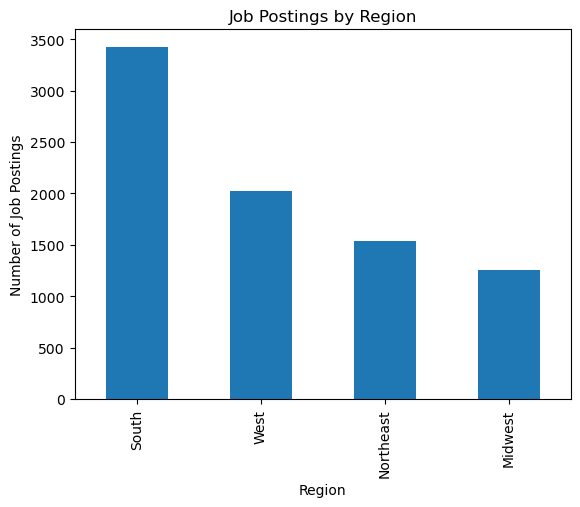

In [49]:
region_count = df['region'].value_counts()
# Plot the bar graph of job postings by region
region_count.plot(kind='bar')
plt.title('Job Postings by Region')
plt.xlabel('Region')
plt.ylabel('Number of Job Postings')
plt.show()
#This code defines a dictionary of regions and their respective states. It then creates a new column called "region" by mapping each state to its respective region. It then counts the number of job postings by region and creates a bar graph showing the number of job postings in each region.


In [52]:
def calculate_skill_match(df, skills):
    """
    Calculates the percentage match of the given skills with the 'skills' column in the given dataset.
    Returns a new dataframe with an additional column 'skill_match' that contains the percentage match
    for each job posting.
    """
    # Convert to set
    skills_set = set(skills)
    
    # Calculate the percentage match for each job posting
    skill_matches = []
    for job_skills in df['skills']:
        # Split the 'skills' string 
        if pd.notna(job_skills):
            job_skills_set = set(job_skills.split(', '))
            # Calculate the percentage of matching skills
            match_percent = len(job_skills_set & skills_set) / len(skills_set) * 100
            skill_matches.append(match_percent)
        else:
            skill_matches.append(np.nan)
    
    # Add the 'skill_match' column to the original dfframe
    df_with_match = df.copy()
    df_with_match['skill_match'] = skill_matches
    
    # Return the new dfframe with the 'skill_match' column
    return df_with_match

In [53]:
#testing skill fn
my_skills = ['Python', 'SQL', 'Node.js' , 'React.js']

# Call the function
matched_data = calculate_skill_match(df, my_skills)

# top 20 job postings with the highest skill match percentage
top_matched = matched_data.nlargest(20, 'skill_match')
print(top_matched[['title', 'company', 'location', 'skill_match', 'salary']])

                                                  title  \
583   Sr Software Engineer - Behavioral Health Corpo...   
658                                 Full Stack Engineer   
690                         Full Stack Node.JS Engineer   
1398      Full Stack Software Engineer, S3VI, FORS, NEO   
1757                      Full Stack Software Developer   
2007                                  Angular Developer   
2196                 Senior Software Engineer (.Net/C#)   
2396                              Outsystems Consultant   
2649                           Cloud Software Developer   
2677                           Cloud Software Developer   
2883                               Full Stack Developer   
2884                               Full Stack Developer   
3622                          Full stack Java Developer   
3702                       Python Software Engineer - G   
5693            Software Developer (No C2C/Sponsorship)   
6567                    Full-stack Developer - C#, .NET 

In [ ]:
def match_jobs_by_salary(df_sal, salary_range):
    for salary in df_sal['salary']:
        if not math.isnan(salary):
            salary = salary.replace(',', '')
        else:
            continue
    # Convert salary range to integer values
    min_salary, max_salary = map(int, salary_range.split('-'))
    
    # Create a new column with salary range as integer values
    df_sal[['min_salary', 'max_salary']] = df_sal['salary'].str.extract(r'\$(\d+,\d+)-\$(\d+,\d+)').apply(lambda x: x.str.replace(',', '')).astype(int)
    
    # Calculate the percentage match based on the min and max salary range
    df_sal['salary_match'] = df_sal.apply(lambda row: (min(row['max_salary'], max_salary) - max(row['min_salary'], min_salary)) / (max_salary - min_salary) * 100, axis=1)
    
    # Return the df_salframe sorted by salary match percentage
    return df_sal.sort_values(by='salary_match', ascending=False)

In [ ]:
# Define a salary range to match
salary_range = '50000-100000'

# Call the match_jobs_by_salary function
matched_data = match_jobs_by_salary(df_sal, salary_range)

# Print the top 10 job postings with the highest salary match percentage
top_matched = matched_data.nlargest(10, 'salary_match')
print(top_matched[['job_title', 'company', 'state', 'salary_match', 'salary']])

In [ ]:
def top_skills(data, n):
    # Create a dictionary to count the occurrences of each skill
    skill_counts = {}

    # Loop over each job listing and count the number of occurrences of each skill
    for skills in data['skills']:
        skill_list = skills.split(',')
        for skill in skill_list:
            if skill in skill_counts:
                skill_counts[skill] += 1
            else:
                skill_counts[skill] = 1

    # Create a DataFrame from the dictionary of skill counts
    skill_df = pd.DataFrame.from_dict(skill_counts, orient='index', columns=['count'])

    # Sort the DataFrame by the count of each skill
    skill_df = skill_df.sort_values(by='count', ascending=False)

    # Return the top n most in-demand skills
    return skill_df.head(n)

In [ ]:
top_skills = top_skills(df, n=15)

# Print the top skills
print(top_skills)

In [ ]:
top_skills.plot(kind='bar')
plt.title('Top Skills')
plt.xlabel('Skills')
plt.ylabel('Demand')
plt.show()

In [ ]:
def jobs_by_state(df):
    state_job_counts = df.groupby(['state', 'title']).size()
    state_job_counts = state_job_counts.reset_index()
    state_job_counts = state_job_counts.rename(columns={0: 'counts'})
    max_counts_index = state_job_counts.groupby('state')['counts'].idxmax()
    max_job_titles = state_job_counts.loc[max_counts_index]
    return max_job_titles

In [ ]:
most_popular_jobs_by_state = jobs_by_state(df)
print(most_popular_jobs_by_state)

In [ ]:
# https://towardsdatascience.com/creating-a-simple-map-with-folium-and-python-4c083abfff94
# Define map center coordinates
map_center = [40.7831, -73.9712] # Example center point in New York City

# Create map object
map = folium.Map(location=map_center, zoom_start=10)

# Iterate over rows in dataset and add markers to the map
for index, row in df.iterrows():
    lat = row['latitude']
    long = row['longitude']
    job_title = row['title']
    company_name = row['company']
    location = row['location']

    # Create HTML string for marker popup
    popup_html = f"<b>{job_title}</b><br>{company_name}<br>{location}"

    # Add marker to map
    folium.Marker(location=[lat, long], popup=popup_html).add_to(map)

# Display the map
# map